# part1) preparing a crime dataset for time series analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
# Use glob to get all filepaths that match the pattern (*=wildcard)
all_files = sorted(glob.glob("Data/Chicago-Crime*.csv"))
all_files

['Data\\Chicago-Crime_2001.csv',
 'Data\\Chicago-Crime_2002.csv',
 'Data\\Chicago-Crime_2003.csv',
 'Data\\Chicago-Crime_2004.csv',
 'Data\\Chicago-Crime_2005.csv',
 'Data\\Chicago-Crime_2006.csv',
 'Data\\Chicago-Crime_2007.csv',
 'Data\\Chicago-Crime_2008.csv',
 'Data\\Chicago-Crime_2009.csv',
 'Data\\Chicago-Crime_2010.csv',
 'Data\\Chicago-Crime_2011.csv',
 'Data\\Chicago-Crime_2012.csv',
 'Data\\Chicago-Crime_2013.csv',
 'Data\\Chicago-Crime_2014.csv',
 'Data\\Chicago-Crime_2015.csv',
 'Data\\Chicago-Crime_2016.csv',
 'Data\\Chicago-Crime_2017.csv',
 'Data\\Chicago-Crime_2018.csv',
 'Data\\Chicago-Crime_2019.csv',
 'Data\\Chicago-Crime_2020.csv',
 'Data\\Chicago-Crime_2021.csv',
 'Data\\Chicago-Crime_2022.csv']

In [2]:
dff = pd.concat([pd.read_csv(f) for f in all_files], ignore_index=True)
dff.info()
dff.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 603.2+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [3]:
df=dff.copy()
df['Datetime']= pd.to_datetime(df['Date'],format="%m/%d/%Y %I:%M:%S %p")
df['Datetime'].head()

0   2001-01-01 01:00:00
1   2001-01-01 13:00:00
2   2001-01-01 13:00:00
3   2001-01-01 01:00:00
4   2001-01-01 01:00:00
Name: Datetime, dtype: datetime64[ns]

In [4]:
df= df.drop(['Date'], axis=1)
df= df.set_index('Datetime')
df['District'] = df['District'].astype('str')
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [5]:
df.to_csv('Data/all_ChicagoCrime.csv.gz', compression="gzip", index=True)

# part2) answer the provided stakeholder questions and support answers with visualizations.
### 1. Comparing Police Districts
- Which district had the most crimes in 2022?
- Which had the least?

In [5]:
crimes_by_District = df.resample('Y')['District'].value_counts(ascending=True)
crimes_by_District

Datetime    District
2001-12-31  20.0         9989
            17.0        14488
            1.0         14861
            22.0        14955
            24.0        15111
                        ...  
2022-12-31  11.0        13457
            4.0         13931
            12.0        14341
            6.0         14694
            8.0         14805
Name: District, Length: 513, dtype: int64

In [6]:
crimes_by_District.head().index

MultiIndex([('2001-12-31', '20.0'),
            ('2001-12-31', '17.0'),
            ('2001-12-31',  '1.0'),
            ('2001-12-31', '22.0'),
            ('2001-12-31', '24.0')],
           names=['Datetime', 'District'])

In [7]:
crimes_by_District=crimes_by_District.loc['2022']
crimes_by_District

Datetime    District
2022-12-31  31.0           15
            20.0         4960
            17.0         6997
            22.0         7671
            14.0         8158
            15.0         8308
            24.0         8469
            16.0         9226
            5.0          9773
            10.0         9961
            7.0         10319
            9.0         10376
            2.0         11793
            3.0         11937
            25.0        11951
            19.0        12243
            18.0        12429
            1.0         13044
            11.0        13457
            4.0         13931
            12.0        14341
            6.0         14694
            8.0         14805
Name: District, dtype: int64

In [8]:
##  Getting indices for min and max
crimes_by_District.agg(['idxmin','idxmax'])

idxmin    (2022-12-31 00:00:00, 31.0)
idxmax     (2022-12-31 00:00:00, 8.0)
Name: District, dtype: object

In [9]:
crimes_by_District.to_frame('Total # of Crimes').style.bar()

Answer: In 2022, the district 8 had the most crimes, the district 31 had the least.
### 2. Crimes Across the Years:
- Is the total number of crimes increasing or decreasing across the year?
- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [10]:
years = df.index.year
crimes_by_Year = years.value_counts().sort_index()
crimes_by_Year

2001    485886
2002    486807
2003    475985
2004    469422
2005    453773
2006    448179
2007    437087
2008    427183
2009    392827
2010    370513
2011    351993
2012    336319
2013    307536
2014    275789
2015    264787
2016    269823
2017    269100
2018    268899
2019    261325
2020    212194
2021    208824
2022    238858
Name: Datetime, dtype: int64

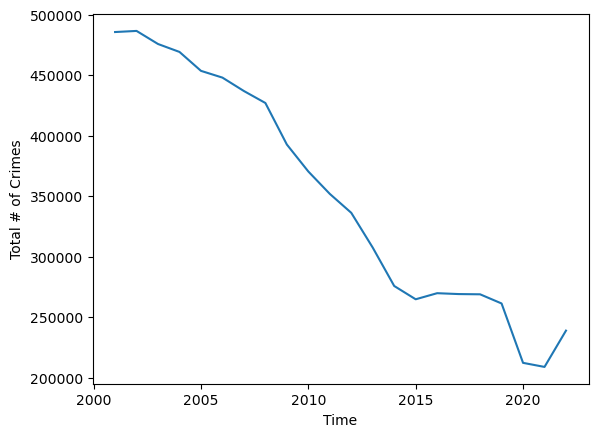

In [11]:
crimes_by_Year.plot(xlabel='Time',ylabel='Total # of Crimes');

In [12]:
crimes_by_Year = df.groupby('Primary Type').resample('Y').size().sort_index()
crimes_by_Year

Primary Type       Datetime  
ARSON              2001-12-31    1011
                   2002-12-31    1032
                   2003-12-31     955
                   2004-12-31     778
                   2005-12-31     691
                                 ... 
WEAPONS VIOLATION  2018-12-31    5456
                   2019-12-31    6339
                   2020-12-31    8432
                   2021-12-31    8980
                   2022-12-31    8766
Length: 723, dtype: int64

In [13]:
## convert to dataframe and reset_index()
plot_df = crimes_by_Year.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,Datetime,# of Crimes
0,ARSON,2001-12-31,1011
1,ARSON,2002-12-31,1032
2,ARSON,2003-12-31,955
3,ARSON,2004-12-31,778
4,ARSON,2005-12-31,691
...,...,...,...
718,WEAPONS VIOLATION,2018-12-31,5456
719,WEAPONS VIOLATION,2019-12-31,6339
720,WEAPONS VIOLATION,2020-12-31,8432
721,WEAPONS VIOLATION,2021-12-31,8980


In [14]:
import datetime as dt
plot_df['Year']= plot_df['Datetime'].dt.year

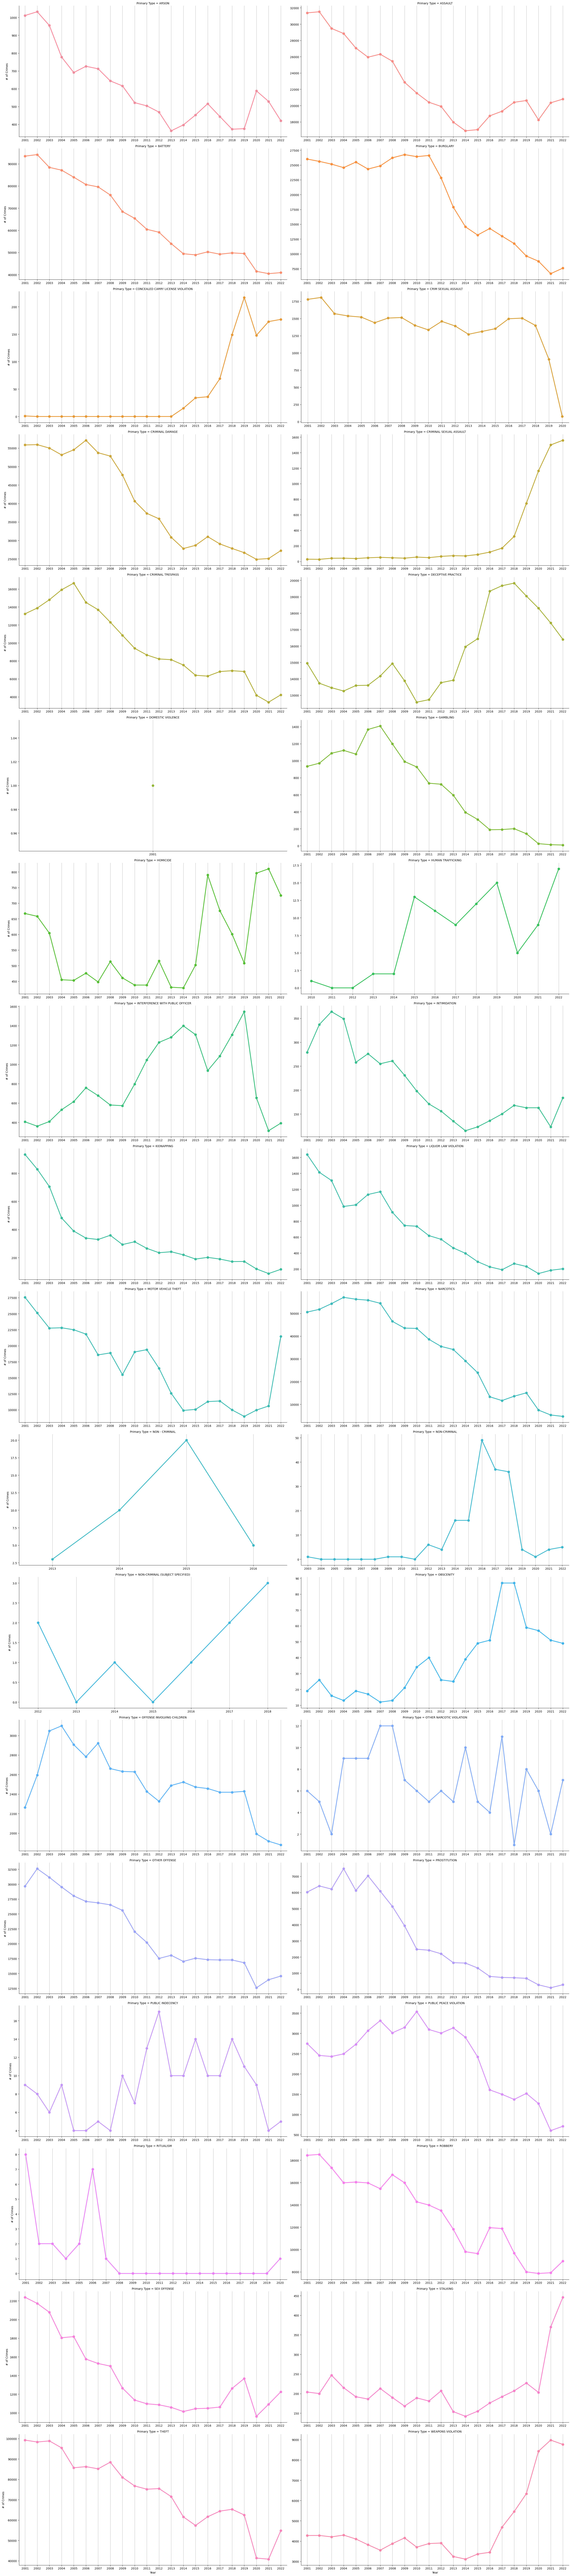

In [15]:
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=7,
                hue='Primary Type', col='Primary Type',col_wrap=2,
                sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

Answer: the total number of crimes is decreasing across the year, but there are individual crimes that are doing the opposite,
such as concealed carry license violation, eaapons violation, obscenity, deceptive practice...
### 3.  Comparing AM vs. PM Rush Hour:
- Are crimes more common during AM rush hour or PM rush hour?
(You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour.
You can consider any crime that occurred between 4 - 7 PM as PM rush hour.)
- What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
- Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [8]:
# adding hour of the day (12am=0) 
df['HourOfDay'] = df.index.hour 
crimes_by_Hour = df.groupby("HourOfDay")['Primary Type'].value_counts()
crimes_by_Hour

HourOfDay  Primary Type                    
0          THEFT                               91882
           BATTERY                             71777
           CRIMINAL DAMAGE                     64386
           DECEPTIVE PRACTICE                  40410
           OTHER OFFENSE                       27799
                                               ...  
23         PUBLIC INDECENCY                        6
           NON-CRIMINAL                            4
           RITUALISM                               3
           HUMAN TRAFFICKING                       1
           NON-CRIMINAL (SUBJECT SPECIFIED)        1
Name: Primary Type, Length: 800, dtype: int64

In [9]:
AM_crime=crimes_by_Hour.loc[7]+crimes_by_Hour.loc[8]+crimes_by_Hour.loc[9]+crimes_by_Hour.loc[10]
AM_crime.sort_values(ascending=False)

Primary Type
THEFT                                260759
BATTERY                              158475
CRIMINAL DAMAGE                      109089
BURGLARY                              96219
OTHER OFFENSE                         89870
DECEPTIVE PRACTICE                    80006
ASSAULT                               73636
NARCOTICS                             67032
MOTOR VEHICLE THEFT                   54035
CRIMINAL TRESPASS                     30493
ROBBERY                               26337
PROSTITUTION                          12215
OFFENSE INVOLVING CHILDREN             8835
WEAPONS VIOLATION                      8435
PUBLIC PEACE VIOLATION                 5460
SEX OFFENSE                            5005
CRIM SEXUAL ASSAULT                    2567
KIDNAPPING                             1649
INTERFERENCE WITH PUBLIC OFFICER       1380
ARSON                                  1139
HOMICIDE                               1133
STALKING                                928
INTIMIDATION       

In [10]:
PM_crime=crimes_by_Hour.loc[16]+crimes_by_Hour.loc[18]+crimes_by_Hour.loc[19]+crimes_by_Hour.loc[17]
PM_crime.sort_values(ascending=False)

Primary Type
THEFT                                379122.0
BATTERY                              288003.0
CRIMINAL DAMAGE                      183423.0
NARCOTICS                            164754.0
ASSAULT                              118179.0
OTHER OFFENSE                         98687.0
BURGLARY                              78604.0
MOTOR VEHICLE THEFT                   74678.0
ROBBERY                               61775.0
DECEPTIVE PRACTICE                    58973.0
CRIMINAL TRESPASS                     48564.0
WEAPONS VIOLATION                     20485.0
OFFENSE INVOLVING CHILDREN            13278.0
PUBLIC PEACE VIOLATION                12135.0
PROSTITUTION                           8125.0
SEX OFFENSE                            5865.0
GAMBLING                               4905.0
INTERFERENCE WITH PUBLIC OFFICER       4403.0
LIQUOR LAW VIOLATION                   4168.0
CRIM SEXUAL ASSAULT                    3874.0
HOMICIDE                               2227.0
KIDNAPPING           

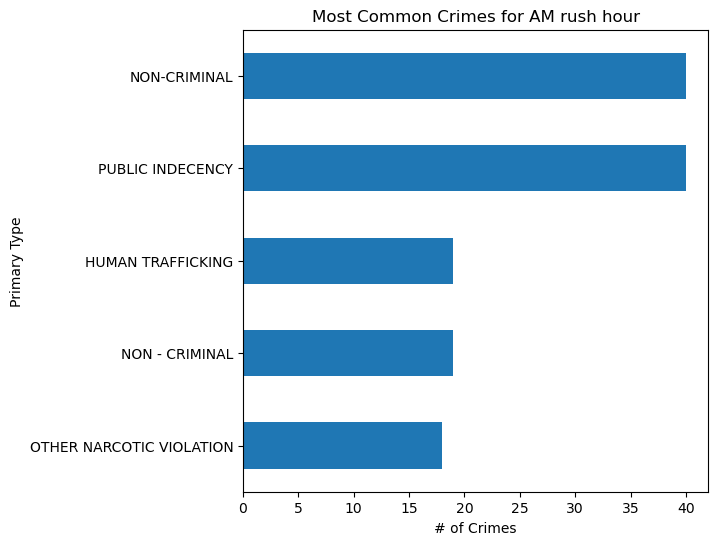

In [67]:
ax = AM_crime.sort_values().head().plot(kind='barh',figsize=(6,6))
ax.set(title='Most Common Crimes for AM rush hour', xlabel='# of Crimes');

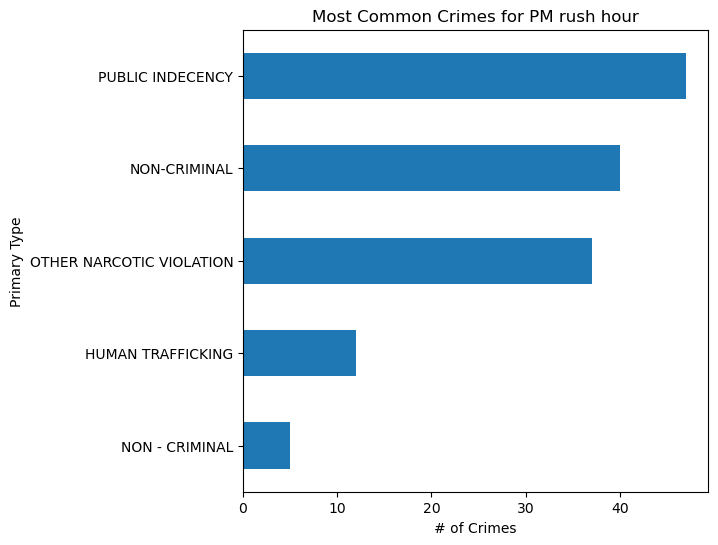

In [71]:
ax = PM_crime.sort_values().dropna().head().plot(kind='barh',figsize=(6,6))
ax.set(title='Most Common Crimes for PM rush hour', xlabel='# of Crimes');

In [72]:
print(f'there are total crimes ~{AM_crime.sum()} during AM rush hour, less than total crimes ~{PM_crime.sum()} during PM rush hour over the 20 years.')
print(f'there are ~54035 MOTOR VEHICLE THEFT during AM rush hour, less than ~74678 during PM rush hour.')

there are total crimes ~1097647 during AM rush hour, less than total crimes ~1641042.0 during PM rush hour over the 20 years.
there are ~54035 MOTOR VEHICLE THEFT during AM rush hour, less than ~74678 during PM rush hour.


### 4. Comparing Months:
- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

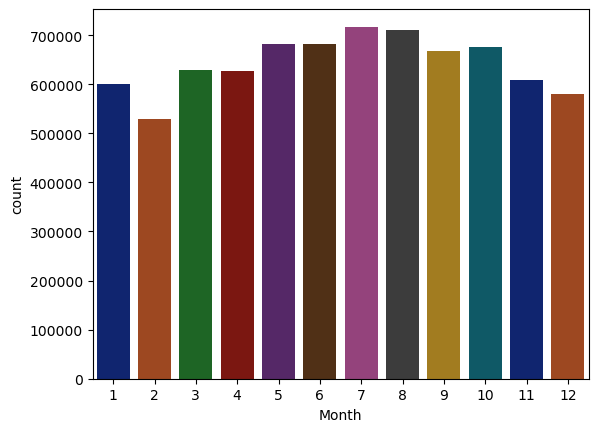

In [7]:
## Extracting the Month
df['Month'] = df.index.month 
sns.countplot(data=df, x='Month',palette='dark');

In [12]:
crimes_by_Month = df.groupby("Primary Type")['Month'].value_counts().sort_index()
crimes_by_Month

Primary Type       Month
ARSON              1         917
                   2         807
                   3        1111
                   4        1097
                   5        1230
                            ... 
WEAPONS VIOLATION  8        9887
                   9        9435
                   10       9190
                   11       7952
                   12       7401
Name: Month, Length: 415, dtype: int64

In [16]:
## convert to dataframe and reset_index()
plot_df = crimes_by_Month.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,Month,# of Crimes
0,ARSON,1,917
1,ARSON,2,807
2,ARSON,3,1111
3,ARSON,4,1097
4,ARSON,5,1230
...,...,...,...
410,WEAPONS VIOLATION,8,9887
411,WEAPONS VIOLATION,9,9435
412,WEAPONS VIOLATION,10,9190
413,WEAPONS VIOLATION,11,7952


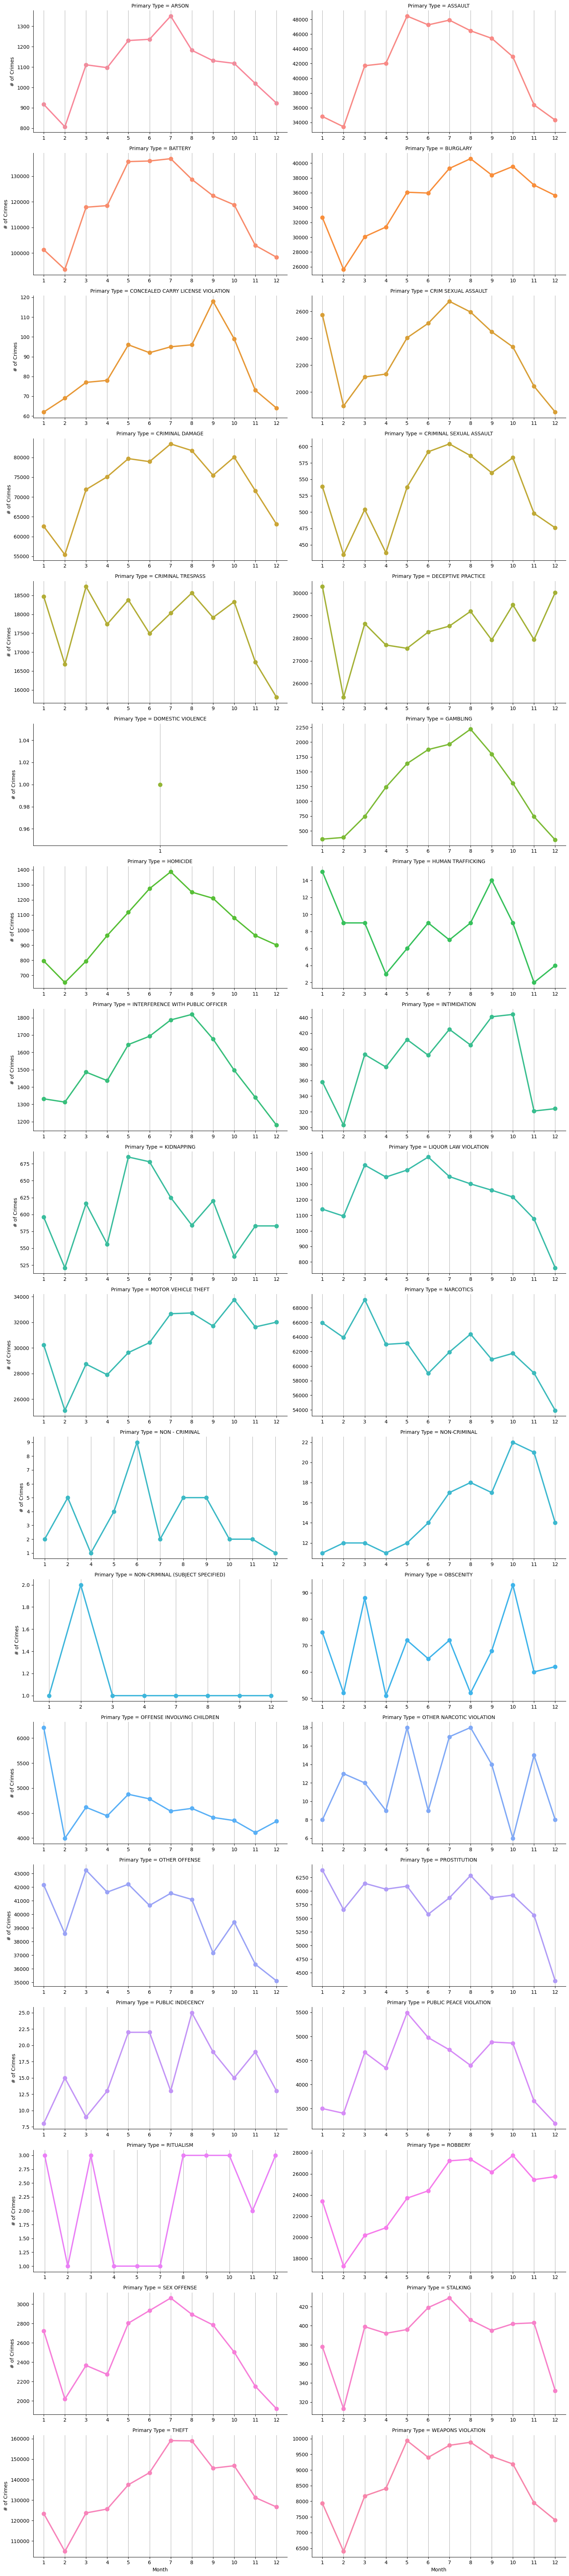

In [17]:
g = sns.catplot(data=plot_df, x='Month', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
                sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

Answer: Overall, Feb has the least crime, Jul and Aug have the most.
There are many individual crimes that do not follow this pattern, such as OFFENSE INVOLVING CHILDREN, OTHER OFFENSE, etc.
### 5. Comparing Holidays:
- ​What are the top 3 holidays with the largest number of crimes?
- For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [19]:
from holidays import country_holidays 
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [24]:
df['Date'] = df.index.date
## Saving both holiday types as columns
df["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
## crimes in US Holidays 
df['US Holiday'].value_counts().head()

New Year's Day      32725
Independence Day    22672
Labor Day           22164
Memorial Day        21125
Columbus Day        20920
Name: US Holiday, dtype: int64

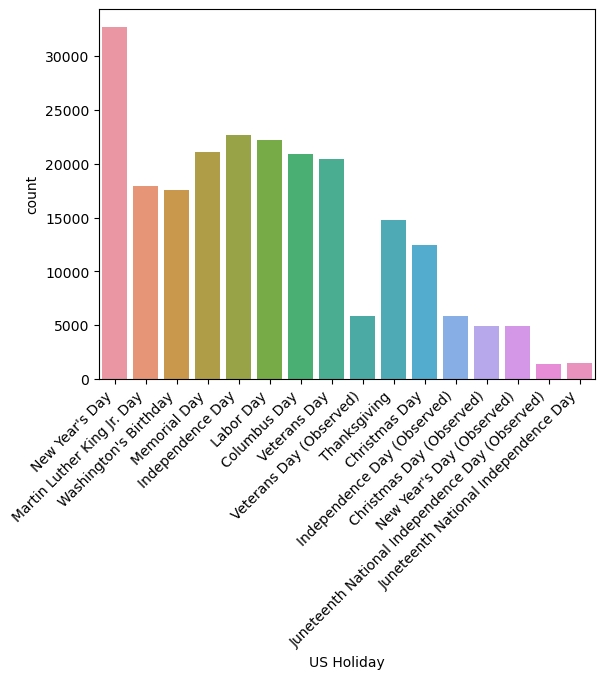

In [26]:
ax = sns.countplot(data=df, x='US Holiday')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');

In [28]:
## Checking the binary 'is holiday' feature
df['US Holiday'].notna().value_counts()

False    7485971
True      227138
Name: US Holiday, dtype: int64

In [33]:
crimes_by_Holiday = df.groupby("US Holiday")['Primary Type'].value_counts(ascending=False)
crimes_by_Holiday['Labor Day'].head()

Primary Type
BATTERY            4607
THEFT              4520
CRIMINAL DAMAGE    2475
NARCOTICS          2078
ASSAULT            1525
Name: Primary Type, dtype: int64

In [35]:
crimes_by_Holiday["New Year's Day"].head()

Primary Type
THEFT                         6845
BATTERY                       6043
CRIMINAL DAMAGE               3236
DECEPTIVE PRACTICE            2934
OFFENSE INVOLVING CHILDREN    2380
Name: Primary Type, dtype: int64

In [36]:
crimes_by_Holiday["Independence Day"].head()

Primary Type
BATTERY            5805
THEFT              4074
CRIMINAL DAMAGE    3309
ASSAULT            1547
NARCOTICS          1522
Name: Primary Type, dtype: int64

The meaning of 'Holiday (observed)' is a question to discuss with your stakeholders. 
Ignoring this, the top three holidays with the largest number of crimes are New Year's Day, Independence Day, and Labor Day.
### 6. What cycles (seasonality) can you find in this data? 
For Total Crime (Weekly) after 2020:
- How long is a cycle?
- ​What is the magnitude of the cycle? (Compare min and max).

In [70]:
plot_df = df.loc['2020':,'ID']
plot_df = plot_df.resample('W').size()
plot_df = plot_df.to_frame('# of Crimes')
plot_df.head()

,# of Crimes
Datetime,
2020-01-05,3601
2020-01-12,4358
2020-01-19,4291
2020-01-26,4358
2020-02-02,4809


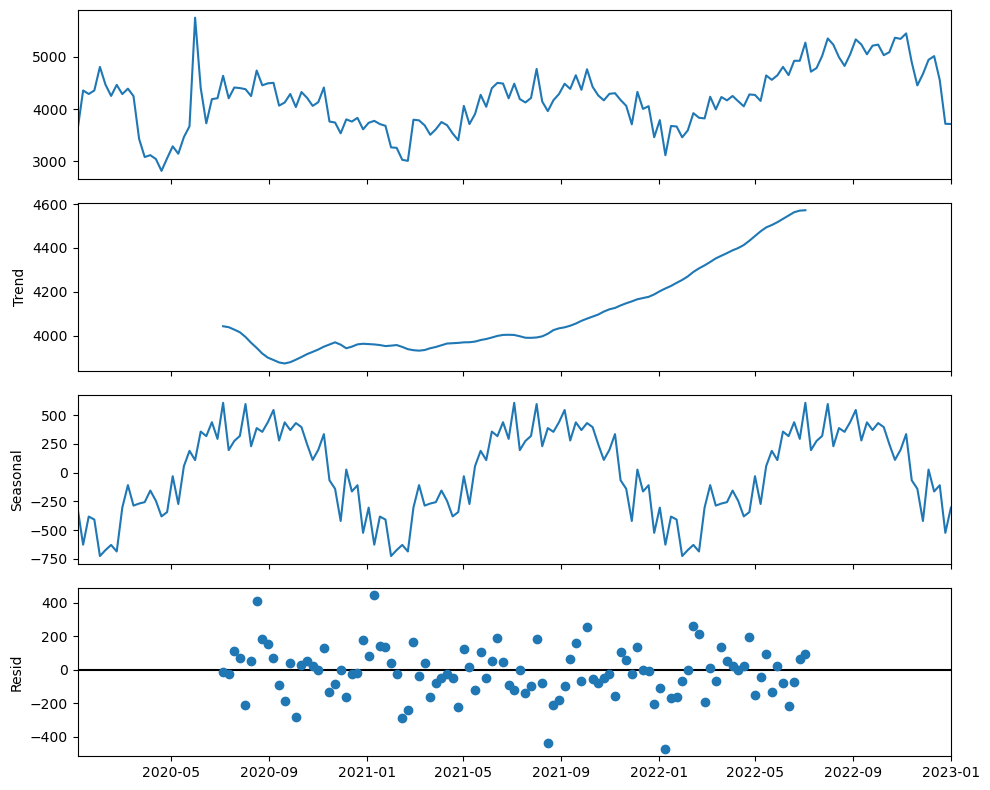

In [71]:
# import the statsmodels time series analysis api module
import statsmodels.tsa.api as tsa
decomp = tsa.seasonal_decompose(plot_df)
fig = decomp.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

In [82]:
#Assessing Seasonal Contributions
seasonal = decomp.seasonal
from scipy.signal import find_peaks
peaks, props = find_peaks(seasonal, height=seasonal.max())
peak_dates = seasonal.index[peaks]
periods = []
for i in range(len(peak_dates)-1):
    delta = peak_dates[i+1] - peak_dates[i]
    periods.append(delta)
periods

[Timedelta('364 days 00:00:00'), Timedelta('364 days 00:00:00')]

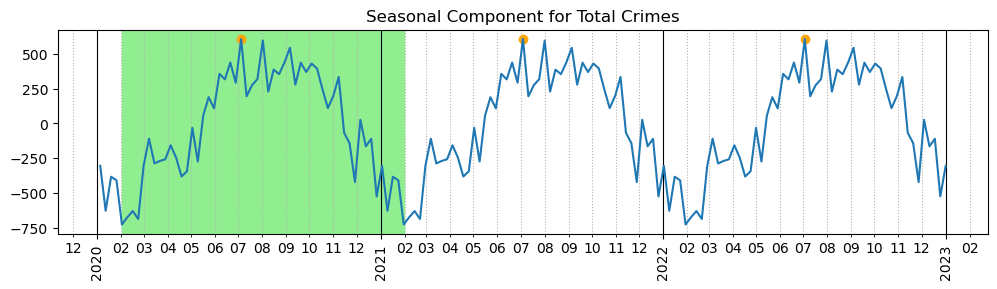

In [84]:
import matplotlib.dates as mdates
def plot_seasonal(seasonal):
    fig, ax = plt.subplots(figsize=(12,3))
    ## creating our tick locators and formatters
    ax.plot(seasonal)
    loc_month = mdates.MonthLocator()
    fmt_month = mdates.DateFormatter("%m")
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_month)
    ax.xaxis.set_minor_formatter(fmt_month)
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ax.set(title=f'Seasonal Component for Total Crimes')
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='black')
    fig.autofmt_xdate(rotation=90, ha='center')
    return fig, ax

fig,ax = plot_seasonal(seasonal)
season_start = seasonal.idxmin()
ax.axvspan( season_start, season_start +periods[0], color='lightgreen')
ax.scatter(peak_dates, props['peak_heights'], color='orange');